# Math 350 Project Python Notebook

In [39]:
%matplotlib inline
import math
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Chapter 10

In [10]:

def sp(dataset1, dataset2):
    
    m1 = dataset1[0]
    s1 = dataset1[1]
    n1 = dataset1[2]

    m2 = dataset2[0]
    s2 = dataset2[1]
    n2 = dataset2[2]

    term1 = ((n1 - 1) * s1 **2)
    term2 = ((n2 - 1) * s2 **2)
    df = n1 + n2 - 2

    sp = math.sqrt((term1 + term2) / df)

    return sp

def t(dataset1, dataset2):
    
    m1 = dataset1[0]
    m2 = dataset2[0]

    n1 = dataset1[2]
    n2 = dataset2[2]

    spVar = sp(dataset1, dataset2)

    tScore = (m1 - m2) / (spVar * math.sqrt((1 / n1) + (1 / n2)))

    return tScore

n1 = 72
n2 = 74

dmx1 = [78.2, 15.0, 72]
control1 = [84.4, 12.6, 74]

dmx2 = [84.1, 13.2, 72]
control2 = [88.4, 11.8, 74]

dmx3 = [76.5, 14.6, 72]
control3 = [84.5, 12.7, 74]

dmx4 = [84.9, 13.1, 72]
control4 = [87.6, 12.9, 74]

dmx5 = [78.0, 16.5, 72]
control5 = [85.4, 12.4, 74]

dmx6 = [86.8, 14.8, 72]
control6 = [96.8, 13.4, 74]

dmx7 = [83.2, 16.8, 72]
control7 = [91.0, 15.9, 74]

dmx = [dmx1, dmx2, dmx3, dmx4, dmx5, dmx6, dmx7]
control = [control1, control2, control3, control4, control5, control6, control7]

df = n1 + n2 - 2

for i in range(7):

    tScore = t(dmx[i], control[i])

    print('The t score for dataset {} is: {:.4f}, with df = {}'.format(i + 1, tScore, df))



The t score for dataset 1 is: -2.7071, with df = 144
The t score for dataset 2 is: -2.0764, with df = 144
The t score for dataset 3 is: -3.5353, with df = 144
The t score for dataset 4 is: -1.2548, with df = 144
The t score for dataset 5 is: -3.0689, with df = 144
The t score for dataset 6 is: -4.2820, with df = 144
The t score for dataset 7 is: -2.8819, with df = 144


In [9]:
def ci(dataset1, dataset2, invT = 1.9765):

    xbar1 = dataset1[0]
    xbar2 = dataset2[0]

    n1 = dataset1[2]
    n2 = dataset2[2]

    spVar = sp(dataset1, dataset2)

    interval = []

    negative = (xbar1 - xbar2) - invT * spVar * math.sqrt((1 / n1) + (1 / n2))
    positive = (xbar1 - xbar2) + invT * spVar * math.sqrt((1 / n1) + (1 / n2))
    
    interval.append(negative)
    interval.append(positive)

    return tuple(interval)

for i in range(7):

    interval = ci(dmx[i], control[i])

    print('The 95% CI for dataset {} is: {}'.format(i + 1, interval))

The 95% CI for dataset 1 is: (-10.726732115588124, -1.6732678844118807)
The 95% CI for dataset 2 is: (-8.393021912854568, -0.20697808714545562)
The 95% CI for dataset 3 is: (-12.472546649124538, -3.5274533508754615)
The 95% CI for dataset 4 is: (-6.953054404350633, 1.5530544043506556)
The 95% CI for dataset 5 is: (-12.165907008196267, -2.634092991803743)
The 95% CI for dataset 6 is: (-14.615788108838103, -5.384211891161897)
The 95% CI for dataset 7 is: (-13.149428318427365, -2.4505716815726304)


## Chapter 11

The mean for the data is 17.6122, the standard deviation is 0.0880, and the df is: 59
The X**2 score is: 60.0000
The X**2 99% CI is: (0.12508701429493654, 0.07812594161765504)
Operating at super!


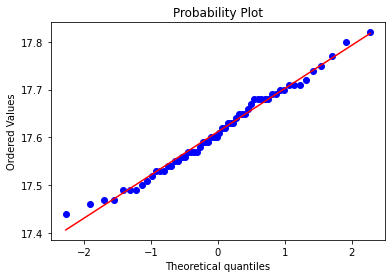

In [45]:
def sVal(data):

    s = 0
    n = len(data)

    xSquared = 0
    sumSquared = (data.sum() ** 2) / n
    
    for point in data:
        xSquared += (point ** 2)

    s = math.sqrt((xSquared - sumSquared) / (n - 1))

    return s

def chi(data, default = None):
    
    if default == None:
        n = len(data)
        std = data.std()

        chiScore = ((n - 1) / std ** 2) * (sVal(data) ** 2)

        return chiScore

    else:
        
        n = len(data)

        return math.sqrt((n - 1) / default) * sVal(data)

def chiCI(data, left, right):
    

    interval = []

    if left == right:

        interval.append(chi(data, left))
        interval.append(chi(data, left))

    else:
        interval.append(chi(data, left))
        interval.append(chi(data, right))

    return tuple(interval)

data = [17.59, 17.63, 17.68, 17.57, 17.70, 17.77, 17.54, 17.65, 17.49, 17.60, 17.61, 17.72, 17.68, 17.69, 17.57, 17.66, 17.55, 17.80, 17.67, 17.53, 17.71, 17.54, 17.68, 17.75, 17.46, 17.82, 17.62, 17.53, 17.47, 17.50, 17.74, 17.65, 17.68, 17.68, 17.71, 17.64, 17.65, 17.62, 17.56, 17.60, 17.51, 17.70, 17.47, 17.57, 17.55, 17.63, 17.44, 17.60, 17.63, 17.59, 17.69, 17.53, 17.59, 17.57, 17.49, 17.52, 17.71, 17.56, 17.49, 17.58]

data = np.array(data)
n = 60

LSL = 16.72
T = 17.60
USL = 18.48

sup = data.std() < ((USL - LSL) / 12)

mean = data.mean()
std = data.std()
df = n - 1

print('The mean for the data is {:.4f}, the standard deviation is {:.4f}, and the df is: {}'.format(mean, std, df))

print('The X**2 score is: {:.4f}'.format(chi(data)))

print('The X**2 99% CI is: {}'.format(chiCI(data, 29.707, 76.154)))

if sup:
    print('Operating at super!')
else: 
    print('Not operating efficiently!')


# plt.subplot(111)

_ = sp.probplot(data, plot = plt)

## Chapter 12

In [ ]:
n = 6157
a = 1858

age = 23